In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Explorating the Titanic Dataset
## by Erik Portillo

## Preliminary Wrangling

I chose to explore the titanic dataset, which is information gathered for 887 of the 2229 passengers on board the ill-fated ship

Variable information: 
>P_class stands for 1st class, 2nd class, and 3rd class. It is an indicator socio-economic status. 
>Siblings/Spouses- brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)


### Uploading, asessing, and cleaning up the dataset

In [2]:
df_1 = pd.read_csv('titanic.csv')

In [3]:
df_1.head(25)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [4]:
#not needed
del df_1['Fare']

In [5]:
#renaming the columns names to make it easier to manipulate the columns
df_1.rename(columns={'Siblings/Spouses Aboard': 'Siblings/Spouses', 'Parents/Children Aboard': 'Parents/Children'}, inplace=True)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
Survived            887 non-null int64
Pclass              887 non-null int64
Name                887 non-null object
Sex                 887 non-null object
Age                 887 non-null float64
Siblings/Spouses    887 non-null int64
Parents/Children    887 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 48.6+ KB


In [7]:
df_1.shape

(887, 7)

In [8]:
df_1.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children
count,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315
std,0.487004,0.836662,14.121908,1.104669,0.807466
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


### What is the structure of your dataset?

There are 887 observations and 8 columns, but I will be analyzing 5 of those variables. All of them are categorical except the age variable which is a continous numeric variable. 

### What is/are the main feature(s) of interest in your dataset?

I am mainly interested in what conditions or background of the person resulted in a higher chance for survival. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that would best help support my investigation are: 
1. Survivors vs Deaths
2. P_Class (which is an indication of wealth).
3. Gender.
4. Age. 
5. Siblings/Spouses.
6. Parents/Children. 

## Data Manipulation 
> I manipulated each of the variable that I will be analyzing, to make it possible for me to create visualizations. For the survived and age data, I distinquished between the survivors and casualities.

In [9]:
survival_data = df_1['Survived']
survived = (survival_data == 1).sum()
casualties = (survival_data == 0).sum()

In [10]:
pclass = df_1['Pclass']


In [11]:
gender_data = df_1['Sex']


In [12]:
age_data = df_1['Age']
survived_age_data = age_data[survival_data==1].dropna()
casualties_age_data = age_data[survival_data==0].dropna()

## Univariate Exploration

### Survivors vs Deaths

My first observation will be the number of survivors vs deaths. This will be the most important variable because from this variable I will figure out what percentage belong to a certain kind of background. For now, I will only observe this variable on its own. 

In [13]:
# This is to remove different colors for each histogram and make it cleaner.
base_color = sb.color_palette()[0]

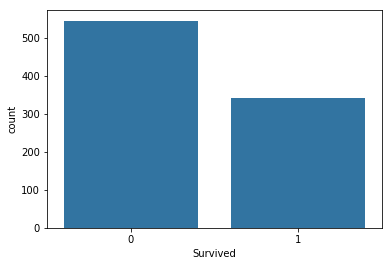

In [14]:
sb.countplot(data= df_1, x = 'Survived', color = base_color );

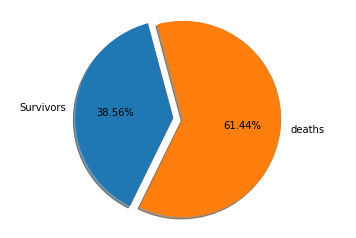

In [15]:
def drawPieChart(labels,sizes,explode,startangle):
    '''
    Function to produce pie charts
    '''
    plt.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%', shadow=True, startangle=startangle) 
    plt.axis('equal')
    plt.show()
    
drawPieChart(['Survivors', 'deaths'],[survived,casualties],(0.1, 0),105)

As expected, there were more deaths than survivors from these 887 recorded passangers. 

### Class 


And how big are the differences between the socia-ecomomic background of each passanger?

In [16]:
#classified the p_class by order 
cat_order = df_1['Pclass'].value_counts().index

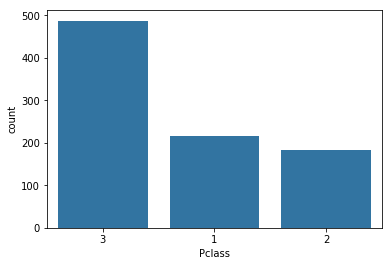

In [17]:
sb.countplot(data= df_1, x = 'Pclass', color = base_color, order = cat_order );

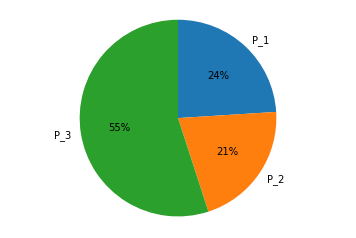

In [18]:
#Another demostration of the orderd p_class but with the use of a pie chart
labels = 'P_1', 'P_2', 'P_3'
sizes = [24, 21, 55]
explode = (0, 0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels,autopct='%1.0f%%', startangle = 90,
        counterclock = False)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


3rd class made up more than half of both 1st and 2nd class, respectively. However, there were a bit more 1st class passangers on board than 2nd class passangers.  

### Sex

Was there a big gap between male and female? 

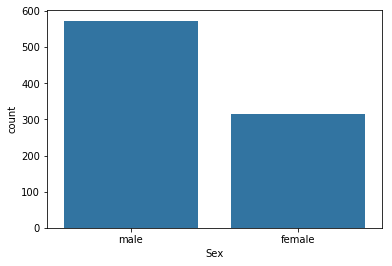

In [19]:
sb.countplot(data= df_1, x = 'Sex', color = base_color);

In [20]:
# The sum total for male and female
male_count = (gender_data == 'male').sum()
female_count = (gender_data == 'female').sum()
print(male_count)
print(female_count)

573
314


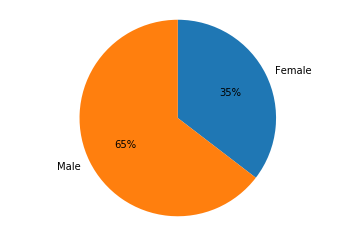

In [21]:
labels = 'Female', 'Male'
sizes = [314, 573]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels,autopct='%1.0f%%', startangle = 90,
        counterclock = False)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

More than half of the passangers were male! This indicates that more deaths for male.  

### Age

In [22]:
#Information on age. This states that the mean age was about 29. 
df_1['Age'].describe()

count    887.000000
mean      29.471443
std       14.121908
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

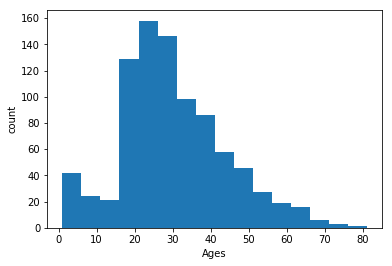

In [23]:
#Histogram showing the distribution of age for all passangers 
bin_edges = np.arange(1, df_1['Age'].max()+5, 5)
plt.hist(data = df_1, x = 'Age', bins = bin_edges)
plt.ylabel('count')
plt.xlabel('Ages')
plt.show()

There were more passengers between ages 15 to early 30's, with the peak being mid 20s.

### Siblings and spouses

In [24]:
order_ss = df_1['Siblings/Spouses'].value_counts().index

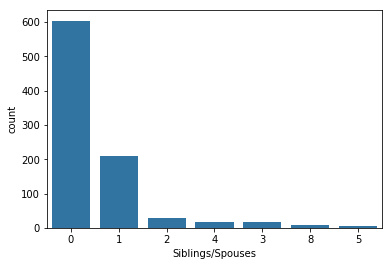

In [25]:
# Histogram showing those considered siblings or spouse
sb.countplot(data= df_1, x = 'Siblings/Spouses', color = base_color, order = order_ss );

Most were not considered a sibling or spouse but about 200 had at least one.  

### Parents and children

In [26]:
order_pc = df_1['Parents/Children'].value_counts().index

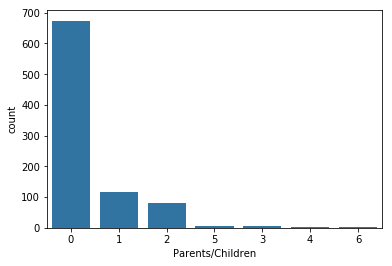

In [27]:
#Histogram of passangers identified as parent or children
sb.countplot(data= df_1, x = 'Parents/Children', color = base_color, order = order_pc );

Most did not have parents or children but those who had at least one (of either) was about 100.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The most important variable will be the "Survived" data. I will use this variable by relating it to other factors that may have influenced those who survived or not. These factors will be:  gender, class, and age of the passangers. This means leaving out the siblings/spouses and parents/children variable. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The adjustment I made was changing the variable name of the Siblings/Spouses and Parents/Children; I removed the aboard with the space in order to make it easier for me to manipulate the column. I also manipulated each of the variable that I will be analyzing, to make possible to create visuals. For the survived and age data, I distinquished between survivors and casualties.

## Bivariate Exploration

### Casualities/surivivors relating to Pclass

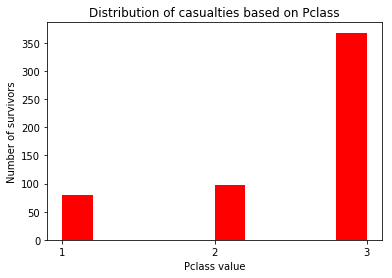

In [28]:
#Data that shows the p_class based on those who did not survive
pclass_casualties = pclass[survival_data == 0]
def drawHistogram(data,title,xlabel,ylabel,xticks=None,yticks=None,bins=None,color=None):
    '''
    Function to produce histogram
    '''
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks != None :
        plt.xticks(xticks)
    if yticks != None :
        plt.yticks(yticks)
    plt.hist(data,bins=bins,color=color)
    plt.show()

drawHistogram(pclass_casualties,'Distribution of casualties based on Pclass',
              'Pclass value','Number of survivors',range(1,4),color='Red')

In [29]:
#sorted p_class values
pclass_values = sorted(pclass.unique())

#function to provide print statements pertaining to the Casualty and survival date for male and female, seperated by p_class
def calculateSurvivalRate(condition=True):
    '''
    Function to calculate survival Rates
    '''
    print('----------------------------------') 
    for val in pclass_values:
        pclass_count = ((pclass == val) & (condition)).sum()
        pclass_survivors = ((pclass == val)&(survival_data == 1) & (condition)).sum()
        pclass_casualties = ((pclass == val)&(survival_data == 0) & (condition)).sum()
        
        print('Pclass {0} Metrics: '.format(val))
        print('Total Count : ',pclass_count)
        print('Total Number Of Survivors: ',pclass_survivors)
        print('Total Number Of casualties: ',pclass_casualties)
        print('Survival Rate: {0}%'.format(round((pclass_survivors/pclass_count)*100.0,2)))
        print('----------------------------------')

In [30]:
calculateSurvivalRate()

----------------------------------
Pclass 1 Metrics: 
Total Count :  216
Total Number Of Survivors:  136
Total Number Of casualties:  80
Survival Rate: 62.96%
----------------------------------
Pclass 2 Metrics: 
Total Count :  184
Total Number Of Survivors:  87
Total Number Of casualties:  97
Survival Rate: 47.28%
----------------------------------
Pclass 3 Metrics: 
Total Count :  487
Total Number Of Survivors:  119
Total Number Of casualties:  368
Survival Rate: 24.44%
----------------------------------


As expected, more deaths came from 3rd class based on the majority of the passangers coming from the class.

### Casualties/surivivors relating to Gender

In [31]:
#code for the male and female survivors 
male_survivors = ((gender_data == 'male') & (survival_data == 1)).sum()
female_survivors = ((gender_data == 'female') & (survival_data == 1)).sum()

#code for the male and female casualties 
male_casualties = male_count - male_survivors
female_casualties = female_count - female_survivors


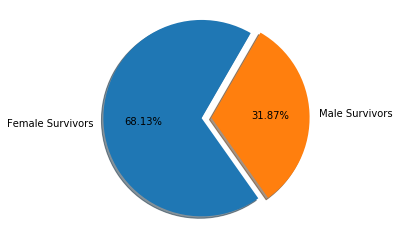

In [32]:
drawPieChart(['Female Survivors', 'Male Survivors'],[female_survivors,male_survivors],(0.1, 0),60)

In [33]:
# In words, number of both male and female, and their survived and Casualty number. 
print('-------------------------------------')
print('Total number of males: ',male_count)
print('Total number of male survivors: ',male_survivors)
print('Total number of male casualties: ',male_casualties)
print('--------------------------------------')
print('Total number of females: ',female_count)
print('Total number of female survivors: ',female_survivors)
print('Total number of female casualties: ',female_casualties)
print('--------------------------------------')

-------------------------------------
Total number of males:  573
Total number of male survivors:  109
Total number of male casualties:  464
--------------------------------------
Total number of females:  314
Total number of female survivors:  233
Total number of female casualties:  81
--------------------------------------


There were more than double the amount of female survivors than male. 

### Casualties/surivivors relating to Age 

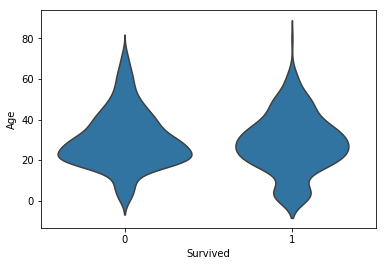

In [34]:
#Violin plot 
base_color = sb.color_palette()[0]
sb.violinplot(data = df_1, x = 'Survived', y = 'Age', color = base_color, inner = None);

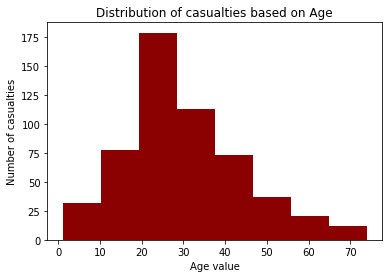

In [35]:
#histogram visual that shows casualties based on age 
drawHistogram(casualties_age_data,'Distribution of casualties based on Age',
              'Age value','Number of casualties',bins=8, color= 'darkred')

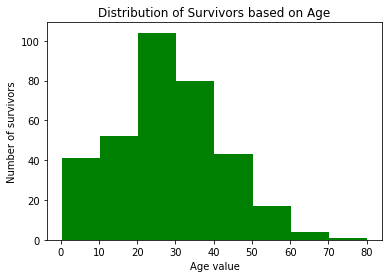

In [36]:
#This histogram shows the surivivors based on age 
drawHistogram(survived_age_data,'Distribution of Survivors based on Age',
              'Age value','Number of survivors',yticks=range(0,120,20),bins=8, color= 'green')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Following from the Bivariate exploration, my main interest will be gender, P_class, and age as it relates to the survived category. I find that there is a relationship between being in 1st class and having a higher chance for survival. Next, female showed far greater rate for survival compared to men. Finally, the age group younger than 10 and 70 and above was also a good indicator. 



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> All the features observed here are relevant to my main interest of finding the conditios that would lead to a higher chance for survival. From "Casualties/surivivors relating to Pclass" I observed being 1st class was an essential condition for survival and would need to be explored more. On "Casualties/surivivors relating to Gender", females were most likely to survive. Finally in 'Casualties/surivivors relating to Age', ages lower than 10 and greater than 70 was also a positive relationship 
> One thing to note was the number of survivors  and casualities being high from early to mid 20's. This is understandable since there were more passangers that fell within this age group.


## Multivariate Exploration

### Casualities based on gender and P_class

For this, I decided to show two histograms to highlight both Male and female, as it relates to deaths and P_class.

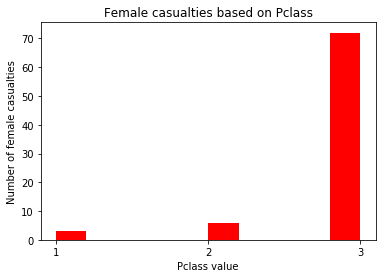

In [37]:
#Females seperated by p_class and who did not survive
pclass_female_casualties = pclass[(survival_data == 0) & (gender_data == 'female')]

drawHistogram(pclass_female_casualties,'Female casualties based on Pclass',
              'Pclass value','Number of female casualties',xticks=range(1,4),color='Red')

In [38]:
# In words, the percentage of the those who survived for each p_class for females
calculateSurvivalRate(gender_data == 'female')

----------------------------------
Pclass 1 Metrics: 
Total Count :  94
Total Number Of Survivors:  91
Total Number Of casualties:  3
Survival Rate: 96.81%
----------------------------------
Pclass 2 Metrics: 
Total Count :  76
Total Number Of Survivors:  70
Total Number Of casualties:  6
Survival Rate: 92.11%
----------------------------------
Pclass 3 Metrics: 
Total Count :  144
Total Number Of Survivors:  72
Total Number Of casualties:  72
Survival Rate: 50.0%
----------------------------------


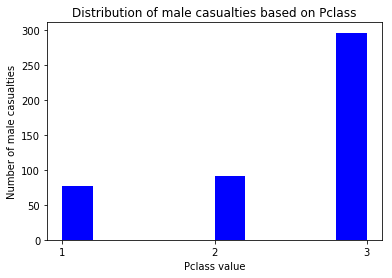

In [39]:
#Males seperated by p_class and who did not survive
pclass_male_casualties = pclass[(survival_data == 0) & (gender_data == 'male')]

drawHistogram(pclass_male_casualties,'Distribution of male casualties based on Pclass',
              'Pclass value','Number of male casualties',xticks=range(1,4),color='blue')

In [40]:
# In words, the percentage of the those who survived for each p_class for males
calculateSurvivalRate(gender_data == 'male')

----------------------------------
Pclass 1 Metrics: 
Total Count :  122
Total Number Of Survivors:  45
Total Number Of casualties:  77
Survival Rate: 36.89%
----------------------------------
Pclass 2 Metrics: 
Total Count :  108
Total Number Of Survivors:  17
Total Number Of casualties:  91
Survival Rate: 15.74%
----------------------------------
Pclass 3 Metrics: 
Total Count :  343
Total Number Of Survivors:  47
Total Number Of casualties:  296
Survival Rate: 13.7%
----------------------------------


Those in the lower class had more victims, then came 2nd class passangers, with 1st class being the lowest. Since there were more passengers that belonged to 3rd class, this would lead to more deaths coming from this class. It could also be possible that wealth may have an impact whether the person lived or not since there were more deaths in 2nd class though there less passangers coming from this class. 

### Casualities based on gender and age

Similarily, what is the distribution of male deaths and female deaths based on age? 

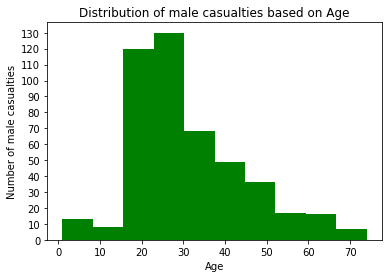

In [41]:
#code that specifies gender and 0 for 'survived'
Age_male_casualties = age_data[(survival_data == 0) & (gender_data == 'male')]

#Histogram showing the male deaths by age
drawHistogram(Age_male_casualties,'Distribution of male casualties based on Age',
              'Age','Number of male casualties',yticks=range(0,200,10),bins=10, color='green')

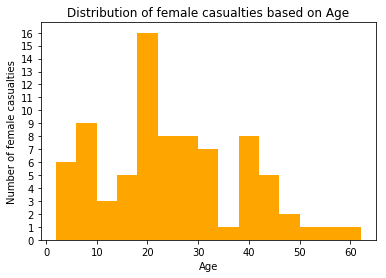

In [42]:
#code that specifies gender and 0 for 'survived'
Age_female_casualties = age_data[(survival_data == 0) & (gender_data == 'female')] 

##Histogram showing the female deaths by age
drawHistogram(Age_female_casualties,'Distribution of female casualties based on Age',
              'Age','Number of female casualties',yticks=range(0,18,1),bins=15, color='orange')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Casualties based on gender and P_class: The relationship that strengthened the chances of surviving was being female and belonging to the first p_class. For both male and female, 3rd class had more than twice the amount of deaths in comparison to 1st and 2nd class. This highlights the importance of being in 1st class and improving chances for survival. 

> Casualties based on gender and age: Being a female older than 50 showed on of the lowest casualties and for males around the age of 10 and 70. This shows that children and older men probably had priority. 



### Were there any interesting or surprising interactions between features?

> Casualties based on gender and P_class: What was interesting was the slighter higher rate of survival in the 1st class. It was possible for the 2nd class to have more survivors since they they were less passangers that belonged to this group.


> Casualties based on gender and age: The mid 30's age group showed the lowest casualties for female. This seems very similair to the survival rate of women around the age of 50 and older. 


## Concluding remarks 


 To conclude, the odds of surviving were higher for females in the upper class and whose ages were around 30 and older than 50. 
 
#### Gender- Females were given more priority than males based on the females having a survival rate of 68.13%, compared to males with a 31.87%
 
#### P_class- Females of upper class and middle class received the highest priority because Pclass exploration shows that females of upper and middle class had a survival rates of more than 90%.
    
#### Age - Even more, females who were around their mid 30s or 50 and older had the lease casualities.

### Sources 

https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

https://datascienceplus.com/seaborn-categorical-plots-in-python/

https://matplotlib.org/2.1.1/gallery/pie_and_polar_charts/pie_features.html

https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c